# ECE239AS Project

#### Load the dataset

In [1]:
from useful.utils import *
from useful.CNN_RNN_v1 import *
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

/Users/shuangyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)


# CNN+ LSTM

In [2]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=val_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target).long()
        output = model(data)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

def main_train(epoches = 10):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    stats['test']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))       
        stats['test'].append(test(test_loader, mode = 'val'))

    

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])
    stats['test'] = np.array(stats['test'])
    print("Best test acc is :")
    print(np.amax(stats['test'][:,1]))

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

### subject 1

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (187, 22, 1000)
Train labels shape:  (187,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/187 (0%)]	Loss: 1.393231
Train Epoch: 0 [100/187 (50%)]	Loss: 1.388658
train loss: 1.3843, Accuracy: 47/187 (25%)
validation loss: 1.3873, Accuracy: 12/50 (24%)

validation loss: 1.3862, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.366503
Train Epoch: 1 [100/187 (50%)]	Loss: 1.370885
train loss: 1.3685, Accuracy: 89/187 (48%)
validation loss: 1.3824, Accuracy: 14/50 (28%)

validation loss: 1.3846, Accuracy: 15/50 (30%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.352442
Train Epoch: 2 [100/187 (50%)]	Loss: 1.350871
train loss: 1.3352, Accuracy: 131/187 (70%)
validation loss: 1.3797, Accuracy: 16/50 (32%)

validation loss: 1.3801, Accuracy: 19/50 (38%)

Train Epoch: 3 [0/187 (0%)]	Loss: 1.336568
T

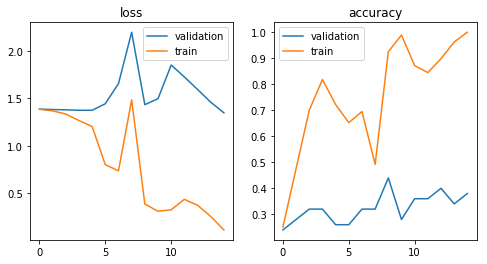

In [3]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 2

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.398113
Train Epoch: 0 [100/186 (50%)]	Loss: 1.386638
train loss: 1.3818, Accuracy: 51/186 (27%)
validation loss: 1.3846, Accuracy: 11/50 (22%)

validation loss: 1.3846, Accuracy: 15/50 (30%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.372033
Train Epoch: 1 [100/186 (50%)]	Loss: 1.379283
train loss: 1.3562, Accuracy: 83/186 (45%)
validation loss: 1.3736, Accuracy: 14/50 (28%)

validation loss: 1.3690, Accuracy: 19/50 (38%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.356026
Train Epoch: 2 [100/186 (50%)]	Loss: 1.347614
train loss: 1.3218, Accuracy: 112/186 (60%)
validation loss: 1.3687, Accuracy: 15/50 (30%)

validation loss: 1.3699, Accuracy: 14/50 (28%)

Train 

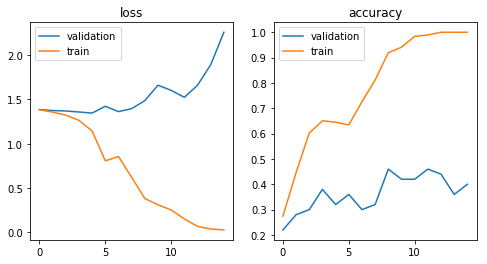

In [4]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A02T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 3

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
Train data shape:  (186, 22, 1000)
Train labels shape:  (186,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/186 (0%)]	Loss: 1.401476
Train Epoch: 0 [100/186 (50%)]	Loss: 1.383138
train loss: 1.3814, Accuracy: 47/186 (25%)
validation loss: 1.3859, Accuracy: 12/50 (24%)

validation loss: 1.3866, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/186 (0%)]	Loss: 1.376426
Train Epoch: 1 [100/186 (50%)]	Loss: 1.354804
train loss: 1.3534, Accuracy: 49/186 (26%)
validation loss: 1.3734, Accuracy: 12/50 (24%)

validation loss: 1.3666, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/186 (0%)]	Loss: 1.307985
Train Epoch: 2 [100/186 (50%)]	Loss: 1.299956
train loss: 1.2969, Accuracy: 103/186 (55%)
validation loss: 1.3293, Accuracy: 24/50 (48%)

validation loss: 1.3403, Accuracy: 19/50 (38%)

Train 

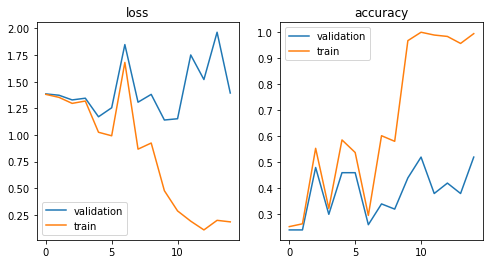

In [5]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A03T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject4

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
Train data shape:  (184, 22, 1000)
Train labels shape:  (184,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/184 (0%)]	Loss: 1.389956
Train Epoch: 0 [100/184 (50%)]	Loss: 1.378440
train loss: 1.3825, Accuracy: 49/184 (27%)
validation loss: 1.3834, Accuracy: 16/50 (32%)

validation loss: 1.3882, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/184 (0%)]	Loss: 1.384018
Train Epoch: 1 [100/184 (50%)]	Loss: 1.362844
train loss: 1.3627, Accuracy: 72/184 (39%)
validation loss: 1.3770, Accuracy: 17/50 (34%)

validation loss: 1.3873, Accuracy: 14/50 (28%)

Train Epoch: 2 [0/184 (0%)]	Loss: 1.379998
Train Epoch: 2 [100/184 (50%)]	Loss: 1.359732
train loss: 1.3300, Accuracy: 102/184 (55%)
validation loss: 1.3703, Acc

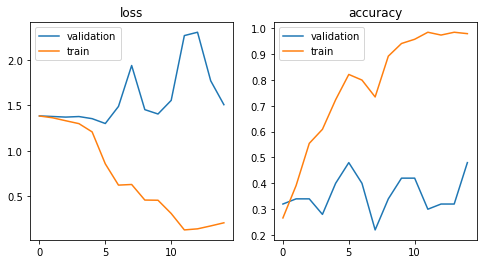

In [6]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A04T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject5

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.388483
Train Epoch: 0 [100/182 (50%)]	Loss: 1.352341
train loss: 1.3831, Accuracy: 54/182 (30%)
validation loss: 1.3875, Accuracy: 12/50 (24%)

validation loss: 1.3870, Accuracy: 14/50 (28%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.346530
Train Epoch: 1 [100/182 (50%)]	Loss: 1.361682
train loss: 1.3606, Accuracy: 75/182 (41%)
validation loss: 1.3822, Accuracy: 15/50 (30%)

validation loss: 1.3774, Accuracy: 18/50 (36%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.371327
Train Epoch: 2 [100/182 (50%)]	Loss: 1.342329
tr

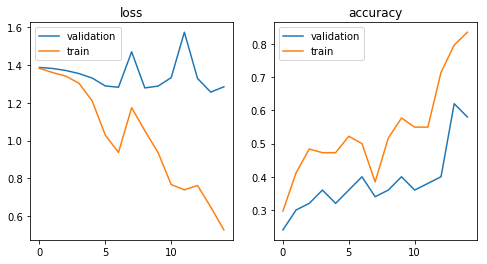

In [7]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A05T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 6

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
Train data shape:  (185, 22, 1000)
Train labels shape:  (185,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/185 (0%)]	Loss: 1.375877
Train Epoch: 0 [100/185 (50%)]	Loss: 1.425707
train loss: 1.3876, Accuracy: 46/185 (25%)
validation loss: 1.3913, Accuracy: 12/50 (24%)

validation loss: 1.3907, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/185 (0%)]	Loss: 1.389793
Train Epoch: 1 [100/185 (50%)]	Loss: 1.372376
train loss: 1.3782, Accuracy: 52/185 (28%)
validation loss: 1.3888, Accuracy: 12/50 (24%)

validation loss: 1.3893, Accuracy: 12/50 (24%)

Train Epoch: 2 [0/185 (0%)]	Loss: 1.367469
Train Epoch: 2 [100/185 (50%)]	Loss: 1.346558
train loss: 1.3636, Accuracy: 48/185 (26%)
validation loss: 1.3864, Accuracy: 12/50 (24%)

validation loss: 1.

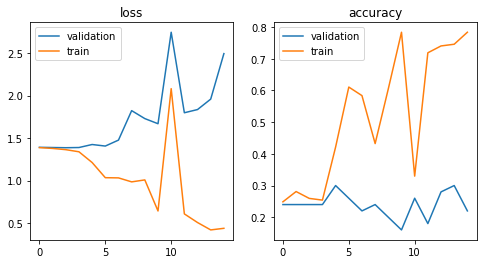

In [8]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A06T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 7

X_shape (288, 22, 1000)
y_shape (1, 1000)
Train data shape:  (188, 22, 1000)
Train labels shape:  (188,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/188 (0%)]	Loss: 1.384711
Train Epoch: 0 [100/188 (50%)]	Loss: 1.370102
train loss: 1.3744, Accuracy: 54/188 (29%)
validation loss: 1.3815, Accuracy: 15/50 (30%)

validation loss: 1.3813, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/188 (0%)]	Loss: 1.354682
Train Epoch: 1 [100/188 (50%)]	Loss: 1.376421
train loss: 1.3197, Accuracy: 87/188 (46%)
validation loss: 1.3588, Accuracy: 18/50 (36%)

validation loss: 1.3478, Accuracy: 16/50 (32%)

Train Epoch: 2 [0/188 (0%)]	Loss: 1.305151
Train Epoch: 2 [100/188 (50%)]	Loss: 1.318353
train loss: 1.2493, Accuracy: 105/188 (56%)
validation loss: 1.3216, Accuracy: 24/50 (48%)

validation loss: 1.2959, Accuracy: 24/50 (48%)

Train Epoch: 3 [0/188 (0%)]	Loss: 1.213244
Train Epoch: 3 [100/188 (50%)]	Loss: 

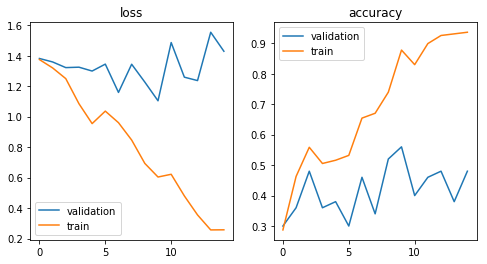

In [9]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A07T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 8

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
Train data shape:  (182, 22, 1000)
Train labels shape:  (182,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/182 (0%)]	Loss: 1.398829
Train Epoch: 0 [100/182 (50%)]	Loss: 1.445860
train loss: 1.3796, Accuracy: 58/182 (32%)
validation loss: 1.3826, Accuracy: 17/50 (34%)

validation loss: 1.3851, Accuracy: 14/50 (28%)

Train Epoch: 1 [0/182 (0%)]	Loss: 1.358437
Train Epoch: 1 [100/182 (50%)]	Loss: 1.394931
train loss: 1.3444, Accuracy: 103/182 (57%)
validation loss: 1.3707, Accuracy: 20/50 (40%)

validation loss: 1.3764, Accuracy: 21/50 (42%)

Train Epoch: 2 [0/182 (0%)]	Loss: 1.295417
Train Epoch: 2 [100/182 (50%)]	Loss: 1.298220

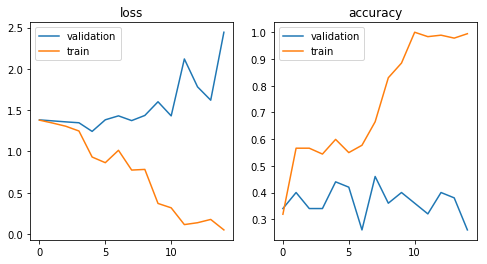

In [10]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A08T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### subject 09

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 22,and be deleted
nan exists on row 61,and be deleted
nan exists on row 92,and be deleted
nan exists on row 93,and be deleted
nan exists on row 159,and be deleted
nan exists on row 202,and be deleted
nan exists on row 204,and be deleted
nan exists on row 218,and be deleted
nan exists on row 239,and be deleted
nan exists on row 250,and be deleted
Train data shape:  (178, 22, 1000)
Train labels shape:  (178,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (50, 22, 1000)
Validation labels shape:  (50,)
Train Epoch: 0 [0/178 (0%)]	Loss: 1.377336
Train Epoch: 0 [100/178 (56%)]	Loss: 1.403547
train loss: 1.3858, Accuracy: 45/178 (25%)
validation loss: 1.3905, Accuracy: 12/50 (24%)

validation loss: 1.3861, Accuracy: 13/50 (26%)

Train Epoch: 1 [0/178 (0%)]	Loss: 1.384440
Train Epoch: 1 [100/178 (56%)]	Loss: 1.363128
train loss: 1.3654, Accuracy: 47/178 (26%)
validation loss: 1.3815, Accuracy: 12/5

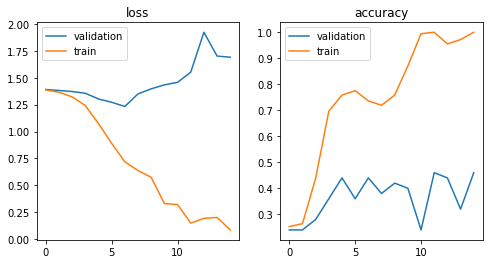

In [11]:
train_loader, test_loader,val_loader = loader()(path='./project_datasets/A09T_slice.mat',
                                                batch_size= 20,
                                                num_test = 50,
                                                num_validation = 50)

#----------------------------------------#

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 15)

### Train on wholeset and test one by one

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 8 [1500/1838 (81%)]	Loss: 1.134324
Train Epoch: 8 [1650/1838 (89%)]	Loss: 1.211718
Train Epoch: 8 [1800/1838 (97%)]	Loss: 1.205516
train loss: 1.1770, Accuracy: 871/1838 (47%)
validation loss: 1.2589, Accuracy: 118/270 (44%)

validation loss: 1.3295, Accuracy: 184/450 (41%)

Train Epoch: 9 [0/1838 (0%)]	Loss: 1.213381
Train Epoch: 9 [150/1838 (8%)]	Loss: 1.034008
Train Epoch: 9 [300/1838 (16%)]	Loss: 1.091606
Train Epoch: 9 [450/1838 (24%)]	Loss: 1.099797
Train Epoch: 9 [600/1838 (32%)]	Loss: 1.110474
Train Epoch: 9 [750/1838 (40%)]	Loss: 1.060663
Train Epoch: 9 [900/1838 (48%)]	Loss: 1.065083
Train Epoch: 9 [1050/1838 (56%)]	Loss: 1.119660
Train Epoch: 9 [1200/1838 (65%)]	Loss: 1.218519
Train Epoch: 9 [1350/1838 (73%)]	Loss: 0.997235
Train Epoch: 9 [1500/1838 (81%)]	Loss: 1.085175
Train Epoch: 9 [1650/1838 (89%)]	Loss: 1.341559
Train Epoch: 9 [1800/1838 (97%)]	Loss: 1.179276
train loss: 1.1131, Accuracy: 953/1838 (52%)
validation loss: 1.2294, Accuracy: 116/270 (43%)

val

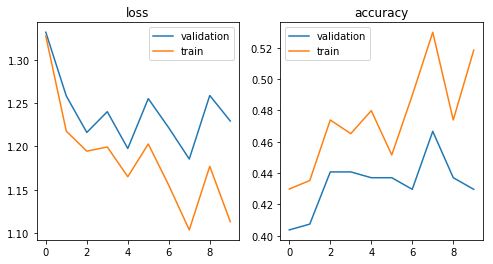

In [3]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_LSTM()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 8 [1500/1838 (81%)]	Loss: 0.978270
Train Epoch: 8 [1650/1838 (89%)]	Loss: 0.838674
Train Epoch: 8 [1800/1838 (97%)]	Loss: 0.988054
train loss: 0.9640, Accuracy: 1089/1838 (59%)
validation loss: 1.1670, Accuracy: 123/270 (46%)

validation loss: 1.2008, Accuracy: 207/450 (46%)

Train Epoch: 9 [0/1838 (0%)]	Loss: 1.003783
Train Epoch: 9 [150/1838 (8%)]	Loss: 1.025158
Train Epoch: 9 [300/1838 (16%)]	Loss: 0.807954
Train Epoch: 9 [450/1838 (24%)]	Loss: 0.862259
Train Epoch: 9 [600/1838 (32%)]	Loss: 0.846707
Train Epoch: 9 [750/1838 (40%)]	Loss: 0.805425
Train Epoch: 9 [900/1838 (48%)]	Loss: 0.965222
Train Epoch: 9 [1050/1838 (56%)]	Loss: 1.094526
Train Epoch: 9 [1200/1838 (65%)]	Loss: 1.114804
Train Epoch: 9 [1350/1838 (73%)]	Loss: 0.870908
Train Epoch: 9 [1500/1838 (81%)]	Loss: 0.963871
Train Epoch: 9 [1650/1838 (89%)]	Loss: 1.039048
Train Epoch: 9 [1800/1838 (97%)]	Loss: 1.115692
train loss: 0.9017, Accuracy: 1131/1838 (62%)
validation loss: 1.2332, Accuracy: 111/270 (41%)

v

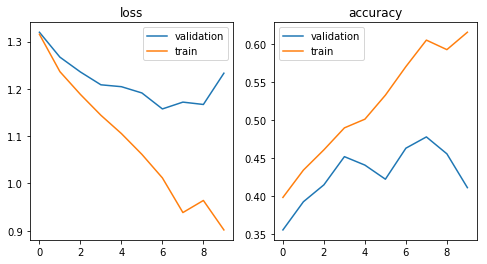

In [4]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = RNN_LSTM()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')